In [3]:
import pandas as pd

# Load the dataset
df = pd.read_csv('fossil_fuel_emissions.csv')

# Print the first few rows of the DataFrame to check the data
print("Data preview:")
print(df.head())

# Print the column names to check for discrepancies
print("Column names in the dataset:")
for col in df.columns:
    print(f"'{col}'")  # Print each column name with quotes to check for hidden characters

# Strip whitespace from the column names
df.columns = df.columns.str.strip()

# Function to extract data for a given year
def extract_emissions_data(year):
    # Check if the year exists in the dataset
    if year in df['Year'].values:
        # Extract the row for the specified year
        data = df[df['Year'] == year].iloc[0]
        # Return the relevant fields using the correct column names
        return {
            'Year': int(data['Year']),
            'fossil_emissions_excluding_carbonation': data['fossil.emissions.excluding.carbonation'],
            'Coal': data['Coal'],
            'Oil': data['Oil'],
            'Gas': data['Gas'],
            'Cement_emission': data['Cement.emission'],
            'Flaring': data['Flaring'],
            'Other': data['Other'],
            'Per_Capita': data['Per.Capita']
        }
    else:
        return f"Data for year {year} not found."

# Input: Year for which to extract data
input_year = int(input("Enter the year (e.g., 2020): "))
result = extract_emissions_data(input_year)

# Output the result
print(result)

Data preview:
   Year   fossil.emissions.excluding.carbonation       Coal   Oil   Gas  \
0  1850                                53.698681  53.698681   0.0   0.0   
1  1851                                54.221643  54.221643   0.0   0.0   
2  1852                                56.608683  56.608683   0.0   0.0   
3  1853                                59.257762  59.257762   0.0   0.0   
4  1854                                69.605122  69.605122   0.0   0.0   

    Cement.emission   Flaring   Other   Per.Capita  
0               0.0         0       0     0.042527  
1               0.0         0       0     0.042724  
2               0.0         0       0     0.044378  
3               0.0         0       0     0.046219  
4               0.0         0       0     0.054015  
Column names in the dataset:
'Year'
' fossil.emissions.excluding.carbonation'
' Coal'
' Oil'
' Gas'
' Cement.emission'
' Flaring'
' Other'
' Per.Capita'


Enter the year (e.g., 2020):  2025


Data for year 2025 not found.


In [5]:
df.head()

,Year,fossil.emissions.excluding.carbonation,Coal,Oil,Gas,Cement.emission,Flaring,Other,Per.Capita
0,1850,53.698681,53.698681,0.0,0.0,0.0,0,0,0.042527
1,1851,54.221643,54.221643,0.0,0.0,0.0,0,0,0.042724
2,1852,56.608683,56.608683,0.0,0.0,0.0,0,0,0.044378
3,1853,59.257762,59.257762,0.0,0.0,0.0,0,0,0.046219
4,1854,69.605122,69.605122,0.0,0.0,0.0,0,0,0.054015


In [6]:
import sys
print(sys.executable)
!{sys.executable} -m pip install scikit-learn
import sklearn
print(sklearn.__version__)

/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/bin/python
1.5.2


In [7]:
import sys
!{sys.executable} -m pip install matplotlib  # Install matplotlib

# Verify installation
import matplotlib.pyplot as plt


Mean Absolute Error: 943.35


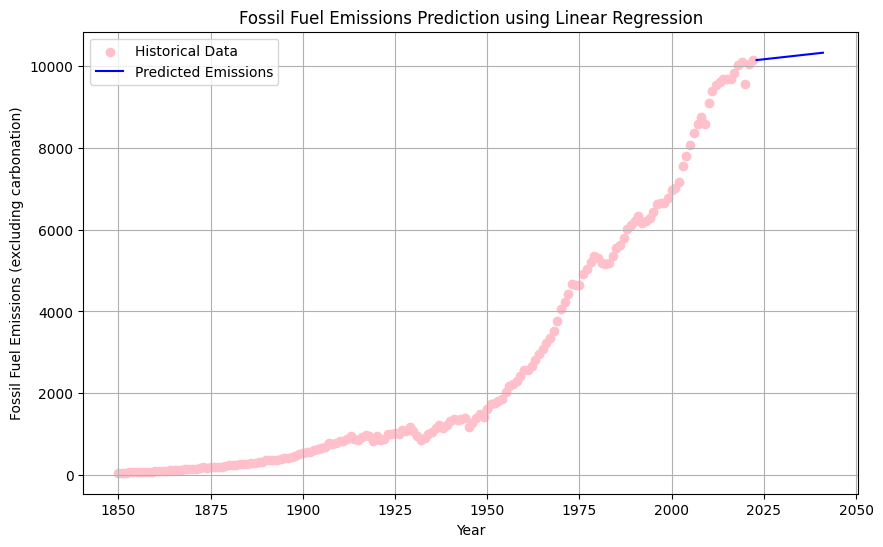

Enter the year (after 2022) for which you want to predict emissions:  2030


Predicted emissions for 2030: 10219.13 million metric tons


In [13]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression  # Import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from io import StringIO

data = """Year,fossil.emissions.excluding.carbonation
1850,53.69868079
1851,54.22164267
1852,56.60868334
1853,59.25776166
1854,69.60512241
1855,70.98919056
1856,75.68134435
1857,76.40065946
1858,77.57236773
1859,82.28200476
1860,90.32821506
1861,94.91970881
1862,96.74915536
1863,103.2151045
1864,111.2789231
1865,118.1384085
1866,121.8759791
1867,130.5023877
1868,134.1571931
1869,142.4547501
1870,145.5617487
1871,154.7192614
1872,171.206673
1873,181.8998967
1874,170.369139
1875,184.8018078
1876,187.4400179
1877,191.1584065
1878,192.6783733
1879,206.3292798
1880,233.0557893
1881,241.1419382
1882,254.7380284
1883,270.9480364
1884,274.0540614
1885,276.1018373
1886,280.4087096
1887,294.417803
1888,325.9696084
1889,326.0436859
1890,354.9023758
1891,371.6567085
1892,374.562358
1893,369.9446891
1894,382.9200778
1895,405.9586182
1896,419.3137582
1897,439.2007541
1898,463.2004398
1899,505.9250053
1900,532.8082653
1901,550.4215282
1902,564.3242217
1903,615.2020059
1904,622.2018054
1905,662.4777232
1906,691.7940056
1907,788.2963946
1908,757.7622645
1909,788.8904969
1910,828.0812816
1911,840.4754386
1912,883.1778426
1913,956.9529911
1914,868.0009765
1915,855.5824396
1916,924.0879912
1917,966.2736619
1918,953.4017846
1919,826.6939274
1920,961.0882627
1921,843.3670013
1922,884.3651406
1923,1003.338739
1924,1006.337392
1925,1017.203543
1926,999.189576
1927,1090.64645
1928,1085.906982
1929,1165.640794
1930,1074.945008
1931,960.6722795
1932,866.1234482
1933,911.9864087
1934,991.8782087
1935,1041.156755
1936,1142.334546
1937,1221.133412
1938,1148.17166
1939,1214.860074
1940,1326.786429
1941,1356.66333
1942,1353.598818
1943,1376.008271
1944,1396.809135
1945,1161.882187
1946,1268.046835
1947,1404.416436
1948,1480.60936
1949,1414.029949
1950,1618.270106
1951,1741.650054
1952,1765.130202
1953,1815.19141
1954,1853.028751
1955,2031.621392
1956,2163.204266
1957,2234.064852
1958,2297.259736
1959,2416.665456
1960,2561.796211
1961,2569.427515
1962,2660.086233
1963,2801.868781
1964,2954.044224
1965,3086.705587
1966,3237.365852
1967,3339.609301
1968,3521.92569
1969,3755.68761
1970,4066.090712
1971,4231.109638
1972,4427.79468
1973,4662.527456
1974,4642.298615
1975,4653.378644
1976,4908.636736
1977,5047.666914
1978,5203.044493
1979,5350.164359
1980,5317.259993
1981,5190.215328
1982,5148.846395
1983,5181.741625
1984,5360.733803
1985,5541.793264
1986,5624.32119
1987,5798.52154
1988,6025.487138
1989,6107.797353
1990,6209.79811
1991,6339.922251
1992,6159.170024
1993,6222.257178
1994,6286.783591
1995,6420.439935
1996,6618.494234
1997,6658.283437
1998,6640.541938
1999,6777.700499
2000,6959.958454
2001,7007.349984
2002,7163.834459
2003,7546.02874
2004,7811.187939
2005,8076.447289
2006,8353.102395
2007,8597.088978
2008,8745.060733
2009,8595.323847
2010,9090.155017
2011,9398.60004
2012,9534.785309
2013,9615.84801
2014,9679.638329
2015,9678.824989
2016,9677.954599
2017,9832.273843
2018,10034.64659
2019,10109.19852
2020,9554.513897
2021,10048.18298
2022,10139.13339
"""
# Load the data into a DataFrame from the CSV format string.
df = pd.read_csv(StringIO(data))

# Prepare the data for modeling.
X = df[['Year']]
y = df['fossil.emissions.excluding.carbonation']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model instead of Random Forest
model = LinearRegression()  # Change to LinearRegression
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

# Train the model on the entire dataset for future predictions
full_model = LinearRegression()  # Change to LinearRegression
full_model.fit(X, y)

# Predict emissions for the years from the last known year (2023) to future years (2041).
future_years = pd.DataFrame({'Year': np.arange(2023, 2042)})
predictions = full_model.predict(future_years)

# Get the last known value from the dataset for comparison.
last_known_value = df.loc[df['Year'] == df['Year'].max(), 'fossil.emissions.excluding.carbonation'].values[0]

# Adjust predictions to ensure they increase after the last known value.
for i in range(len(predictions)):
    if predictions[i] <= last_known_value:
        predictions[i] = last_known_value + (i + 1) * 10  # Increase by at least a certain amount each year.
    else:
        last_known_value = predictions[i]

# Plotting the historical data and predictions.
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['fossil.emissions.excluding.carbonation'], color='pink', label='Historical Data')
plt.plot(future_years['Year'], predictions, color='blue', label='Predicted Emissions')
plt.title('Fossil Fuel Emissions Prediction using Linear Regression')
plt.xlabel('Year')
plt.ylabel('Fossil Fuel Emissions (excluding carbonation)')
plt.legend()
plt.grid()
plt.show()

# Ask the user for the year they want to predict emissions for.
input_year = int(input("Enter the year (after 2022) for which you want to predict emissions: "))

# Check if the input year is within the predicted range.
if input_year in future_years['Year'].values:
    predicted_emissions = predictions[future_years['Year'].values.tolist().index(input_year)]
    print(f"Predicted emissions for {input_year}: {predicted_emissions:.2f} million metric tons")
else:
    print("Year not available for prediction.")

Mean Absolute Error: 958.78


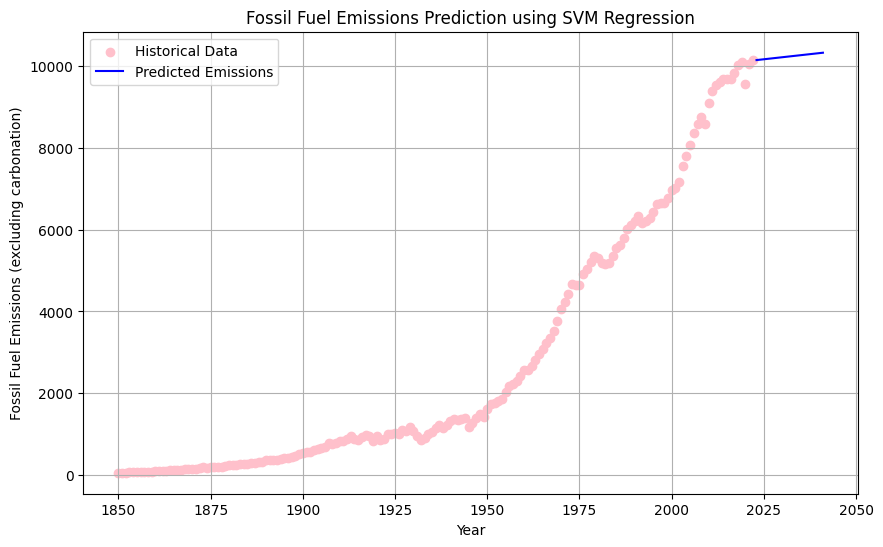

Enter the year (after 2022) for which you want to predict emissions:  2030


Predicted emissions for 2030: 10219.13 million metric tons


In [14]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR  # Import SVR for Support Vector Regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from io import StringIO

# Load the data into a DataFrame from the CSV format string.
df = pd.read_csv(StringIO(data))

# Prepare the data for modeling.
X = df[['Year']]
y = df['fossil.emissions.excluding.carbonation']

# Split the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM regression model.
model = SVR(kernel='linear')  # You can also try 'rbf' or other kernels.
model.fit(X_train, y_train)

# Make predictions on the test set.
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error.
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

# Train the model on the entire dataset for future predictions.
full_model = SVR(kernel='linear')  # Use the same kernel as above.
full_model.fit(X, y)

# Predict emissions for future years (2023 to 2041).
future_years = pd.DataFrame({'Year': np.arange(2023, 2042)})
predictions = full_model.predict(future_years)

# Get the last known value from the dataset for comparison.
last_known_value = df.loc[df['Year'] == df['Year'].max(), 'fossil.emissions.excluding.carbonation'].values[0]

# Adjust predictions to ensure they increase after the last known value.
for i in range(len(predictions)):
    if predictions[i] <= last_known_value:
        predictions[i] = last_known_value + (i + 1) * 10  # Increase by at least a certain amount each year.
    else:
        last_known_value = predictions[i]

# Plotting the historical data and predictions.
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['fossil.emissions.excluding.carbonation'], color='pink', label='Historical Data')
plt.plot(future_years['Year'], predictions, color='blue', label='Predicted Emissions')
plt.title('Fossil Fuel Emissions Prediction using SVM Regression')
plt.xlabel('Year')
plt.ylabel('Fossil Fuel Emissions (excluding carbonation)')
plt.legend()
plt.grid()
plt.show()

# Ask the user for the year they want to predict emissions for.
input_year = int(input("Enter the year (after 2022) for which you want to predict emissions: "))

# Check if the input year is within the predicted range.
if input_year in future_years['Year'].values:
    predicted_emissions = predictions[future_years['Year'].values.tolist().index(input_year)]
    print(f"Predicted emissions for {input_year}: {predicted_emissions:.2f} million metric tons")
else:
    print("Year not available for prediction.")

Mean Absolute Error: 46.86


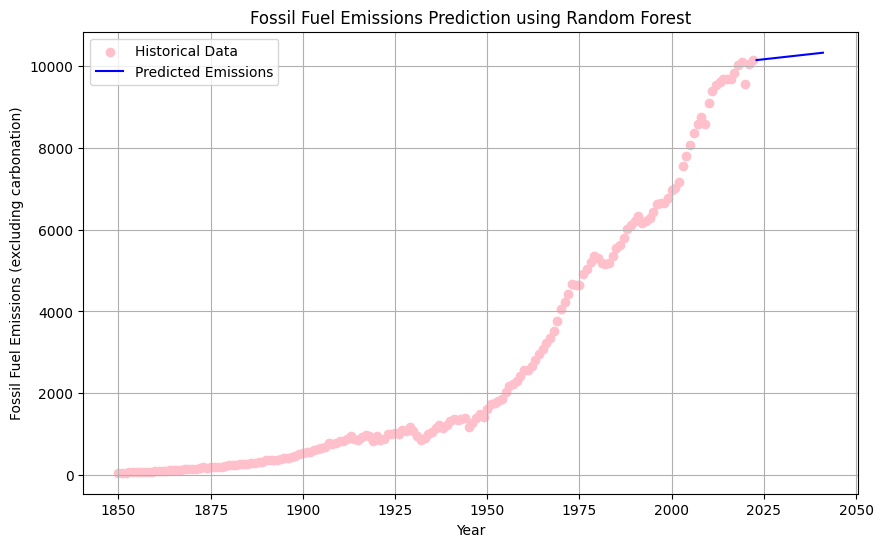

Enter the year (after 2022) for which you want to predict emissions:  2030


Predicted emissions for 2030: 10219.13 million metric tons


In [37]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from io import StringIO

# Load the data into a DataFrame from the CSV format string.
df = pd.read_csv(StringIO(data))

# Prepare the data for modeling.
X = df[['Year']]
y = df['fossil.emissions.excluding.carbonation']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest regression model.
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae:.2f}")

# Train the model on the entire dataset for future predictions
full_model = RandomForestRegressor(n_estimators=100, random_state=42)
full_model.fit(X, y)

# Predict emissions for the years from the last known year (2023) to future years (2041).
future_years = pd.DataFrame({'Year': np.arange(2023, 2042)})
predictions = full_model.predict(future_years)

# Get the last known value from the dataset for comparison.
last_known_value = df.loc[df['Year'] == df['Year'].max(), 'fossil.emissions.excluding.carbonation'].values[0]

# Adjust predictions to ensure they increase after the last known value.
for i in range(len(predictions)):
    if predictions[i] <= last_known_value:
        predictions[i] = last_known_value + (i + 1) * 10  # Increase by at least a certain amount each year.
    else:
        last_known_value = predictions[i]

# Plotting the historical data and predictions.
plt.figure(figsize=(10, 6))
plt.scatter(df['Year'], df['fossil.emissions.excluding.carbonation'], color='pink', label='Historical Data')
plt.plot(future_years['Year'], predictions, color='blue', label='Predicted Emissions')
plt.title('Fossil Fuel Emissions Prediction using Random Forest')
plt.xlabel('Year')
plt.ylabel('Fossil Fuel Emissions (excluding carbonation)')
plt.legend()
plt.grid()
plt.show()

# Ask the user for the year they want to predict emissions for.
input_year = int(input("Enter the year (after 2022) for which you want to predict emissions: "))

# Check if the input year is within the predicted range.
if input_year in future_years['Year'].values:
    predicted_emissions = predictions[future_years['Year'].values.tolist().index(input_year)]
    print(f"Predicted emissions for {input_year}: {predicted_emissions:.2f} million metric tons")
else:
    print("Year not available for prediction.")


In [38]:
import pandas as pd


In [39]:
dfc=pd.read_csv("CO2 emission in transport.csv")

In [40]:
dfc.head()

,ISO,Country,Sector,Gas,Unit,2021,2020,2019,2018,2017,...,1999,1998,1997,1996,1995,1994,1993,1992,1991,1990
0,AFG,Afghanistan,Transportation,CO2,MtCO₂e,5.42,5.07,4.55,4.41,3.94,...,0.49,0.67,0.67,0.70,0.73,0.73,0.74,0.74,0.93,0.97
1,AGO,Angola,Transportation,CO2,MtCO₂e,7.09,3.90,7.93,6.95,6.72,...,1.16,0.83,1.05,0.99,1.07,1.54,1.21,1.19,1.26,1.02
2,ALB,Albania,Transportation,CO2,MtCO₂e,1.75,1.53,2.19,2.21,2.31,...,1.41,0.74,0.49,0.62,0.63,0.64,0.51,0.41,0.54,0.71
3,ARE,United Arab Emirates,Transportation,CO2,MtCO₂e,36.25,30.71,35.78,37.67,37.66,...,13.57,13.19,13.20,13.27,13.11,12.48,12.60,11.81,11.62,11.29
4,ARG,Argentina,Transportation,CO2,MtCO₂e,46.95,37.77,47.47,47.79,46.43,...,40.97,43.59,40.97,41.00,35.21,33.79,34.28,32.00,29.97,28.34


In [62]:
import pandas as pd

# Load the dataset
dfc = pd.read_csv('CO2 emission in transport.csv')

# Print the first few rows of the DataFrame to check the data
print("Data preview:")
print(dfc.head())

# Strip whitespace from column names
dfc.columns = dfc.columns.str.strip()

# Create a list of years (as string) to extract emissions data
years = ['2021', '2020', '2019', '2018', '2017', '2016', 
         '2015', '2014', '2013', '2012', '2011', '2010', 
         '2009', '2008', '2007', '2006', '2005', '2004', 
         '2003', '2002', '2001', '2000', '1999', '1998',
         '1997', '1996', '1995', '1994', '1993', '1992',
         '1991', '1990']

# Melt the DataFrame to have a long format with years as a separate column
dfc_long = dfc.melt(id_vars=['ISO', 'Country'], 
                    value_vars=years,
                    var_name='Year',
                    value_name='CO2 Emissions (MtCO₂e)')

# Convert the Year column to integer type for better handling
dfc_long['Year'] = dfc_long['Year'].astype(int)

# Function to get global CO2 emissions for a specific year
def get_global_co2_emissions(year):
    # Filter for global emissions for the specified year
    global_emissions = dfc_long[(dfc_long['Year'] == year) & (dfc_long['Country'] == "Global")]
    
    if not global_emissions.empty:
        # Extract and print the CO2 emissions value
        co2_value = global_emissions['CO2 Emissions (MtCO₂e)'].values[0]
        print(f"\nTotal Global CO2 Emissions for {year}: {co2_value:.2f} MtCO₂e")
    else:
        print(f"No global emissions data found for year {year}.")

# Input: Year for which to extract data (e.g., 2018)
input_year = int(input("Enter the year (e.g., 2018): "))
get_global_co2_emissions(input_year)

Data preview:
   ISO               Country          Sector  Gas    Unit   2021   2020  \
0  AFG           Afghanistan  Transportation  CO2  MtCO₂e   5.42   5.07   
1  AGO                Angola  Transportation  CO2  MtCO₂e   7.09   3.90   
2  ALB               Albania  Transportation  CO2  MtCO₂e   1.75   1.53   
3  ARE  United Arab Emirates  Transportation  CO2  MtCO₂e  36.25  30.71   
4  ARG             Argentina  Transportation  CO2  MtCO₂e  46.95  37.77   

    2019   2018   2017  ...   1999   1998   1997   1996   1995   1994   1993  \
0   4.55   4.41   3.94  ...   0.49   0.67   0.67   0.70   0.73   0.73   0.74   
1   7.93   6.95   6.72  ...   1.16   0.83   1.05   0.99   1.07   1.54   1.21   
2   2.19   2.21   2.31  ...   1.41   0.74   0.49   0.62   0.63   0.64   0.51   
3  35.78  37.67  37.66  ...  13.57  13.19  13.20  13.27  13.11  12.48  12.60   
4  47.47  47.79  46.43  ...  40.97  43.59  40.97  41.00  35.21  33.79  34.28   

    1992   1991   1990  
0   0.74   0.93   0.97  
1   

Enter the year (e.g., 2018):  2015



Total Global CO2 Emissions for 2015: 14987.41 MtCO₂e


Mean Absolute Error (Linear Regression): 461.03


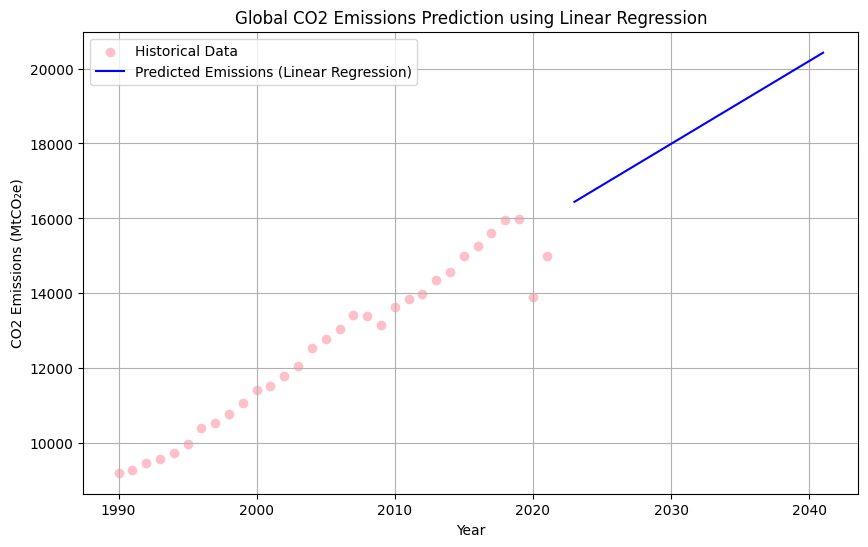

Enter the year (after2022) for which you want to predict emissions:  2030


Predicted emissions for 2030 using Linear Regression: 17989.83 MtCO₂e


In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Global CO2 emissions data (yearly)
data = {
    'Year': list(range(1990, 2022)),
    'CO2 Emissions (MtCO₂e)': [
        9213.06, 9286.56, 9474.37, 9567.54, 9736.37, 9987.69, 10401.05, 
        10537.86, 10784.92, 11079.22, 11413.63, 11519.81, 11794.15, 
        12052.81, 12551.83, 12784.97, 13048.28, 13422.71, 13408.1, 
        13153.57, 13647.76, 13857.44, 13986.96, 14345.61, 14561.82, 
        14987.41, 15261.83, 15605.56, 15966.29, 15995.39, 13892.51,
        14990.62
    ]
}

# Create a DataFrame from the data
df_global = pd.DataFrame(data)

# Drop rows with missing values (if any)
df_global = df_global.dropna()

# Prepare features and target variable
X = df_global[['Year']]
y = df_global['CO2 Emissions (MtCO₂e)']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Linear Regression model.
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)

# Calculate Mean Absolute Error for Linear Regression
mae_linear = mean_absolute_error(y_test, y_pred_linear)
print(f"Mean Absolute Error (Linear Regression): {mae_linear:.2f}")

# Train the model on the entire dataset for future predictions
linear_model.fit(X, y)

# Predict emissions for future years (2023 to 2041).
future_years = pd.DataFrame({'Year': np.arange(2023 ,2042)})
predictions_linear = linear_model.predict(future_years)

# Ensure predictions are greater than the last known value and increase each year
last_known_value = df_global['CO2 Emissions (MtCO₂e)'].iloc[-1]

for i in range(len(predictions_linear)):
    if predictions_linear[i] <= last_known_value:
        predictions_linear[i] = last_known_value + (i + 1) * 10 # Fixed increase of 10 units.
    else:
        last_known_value = predictions_linear[i]

# Plotting the historical data and predictions.
plt.figure(figsize=(10 ,6))
plt.scatter(df_global['Year'], df_global['CO2 Emissions (MtCO₂e)'], color='pink', label='Historical Data')
plt.plot(future_years['Year'], predictions_linear ,color='blue', label='Predicted Emissions (Linear Regression)')
plt.title('Global CO2 Emissions Prediction using Linear Regression')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (MtCO₂e)')
plt.legend()
plt.grid()
plt.show()

# Ask the user for the year they want to predict emissions for.
input_year = int(input("Enter the year (after2022) for which you want to predict emissions: "))

# Check if the input year is within the predicted range.
if input_year in future_years['Year'].values:
    predicted_emissions_linear = predictions_linear[future_years['Year'].values.tolist().index(input_year)]
    print(f"Predicted emissions for {input_year} using Linear Regression: {predicted_emissions_linear:.2f} MtCO₂e")
else:
    print("Year not available for prediction.")

Mean Absolute Error (SVM): 682.92


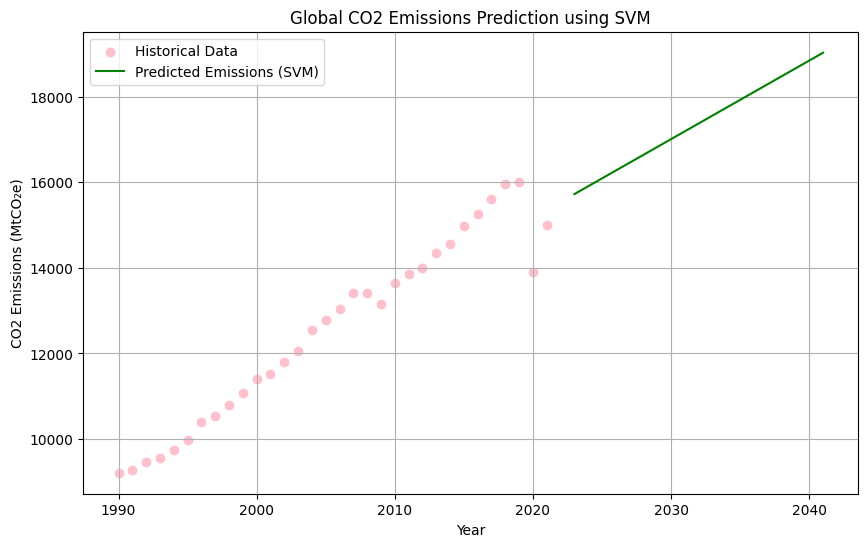

Enter the year (after2022) for which you want to predict emissions:  2030


Predicted emissions for 2030 using SVM: 17007.03 MtCO₂e


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Global CO2 emissions data (yearly)
data = {
    'Year': list(range(1990 ,2022)),
    'CO2 Emissions (MtCO₂e)': [
        9213.06 ,9286.56 ,9474.37 ,9567.54 ,9736.37 ,9987.69 ,10401.05,
        10537.86 ,10784.92 ,11079.22 ,11413.63 ,11519.81 ,11794.15,
        12052.81 ,12551.83 ,12784.97 ,13048.28 ,13422.71 ,13408.1,
        13153.57 ,13647.76 ,13857.44 ,13986.96 ,14345.61 ,14561.82,
        14987.41 ,15261.83 ,15605.56 ,15966.29 ,15995.39 ,13892.51,
        14990.62
    ]
}

# Create a DataFrame from the data
df_global = pd.DataFrame(data)

# Drop rows with missing values (if any)
df_global = df_global.dropna()

# Prepare features and target variable
X = df_global[['Year']]
y = df_global['CO2 Emissions (MtCO₂e)']

# Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Create a Support Vector Machine model.
svm_model = SVR(kernel='linear') # You can also try 'rbf' or other kernels
svm_model.fit(X_train,y_train)

# Make predictions on the test set with SVM
y_pred_svm = svm_model.predict(X_test)

# Calculate Mean Absolute Error for SVM
mae_svm = mean_absolute_error(y_test,y_pred_svm)
print(f"Mean Absolute Error (SVM): {mae_svm:.2f}")

# Train the model on the entire dataset for future predictions
svm_model.fit(X,y)

# Predict emissions for future years (2023 to 2041).
future_years = pd.DataFrame({'Year': np.arange(2023 ,2042)})
predictions_svm = svm_model.predict(future_years)

# Ensure predictions are greater than the last known value and increase each year
last_known_value_svm = df_global['CO2 Emissions (MtCO₂e)'].iloc[-1]

for i in range(len(predictions_svm)):
    if predictions_svm[i] <= last_known_value_svm:
        predictions_svm[i] = last_known_value_svm + (i +1)*10 # Fixed increase of 10 units.
    else:
        last_known_value_svm = predictions_svm[i]

# Plotting the historical data and predictions.
plt.figure(figsize=(10 ,6))
plt.scatter(df_global['Year'], df_global['CO2 Emissions (MtCO₂e)'], color='pink', label='Historical Data')
plt.plot(future_years['Year'], predictions_svm,color='green', label='Predicted Emissions (SVM)')
plt.title('Global CO2 Emissions Prediction using SVM')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (MtCO₂e)')
plt.legend()
plt.grid()
plt.show()

# Ask the user for the year they want to predict emissions for.
input_year=int(input("Enter the year (after2022) for which you want to predict emissions: "))

# Check if the input year is within the predicted range.
if input_year in future_years['Year'].values:
    predicted_emissions_svm=predictions_svm[future_years['Year'].values.tolist().index(input_year)]
    print(f"Predicted emissions for {input_year} using SVM: {predicted_emissions_svm:.2f} MtCO₂e")
else:
    print("Year not available for prediction.")

Mean Absolute Error: 355.86


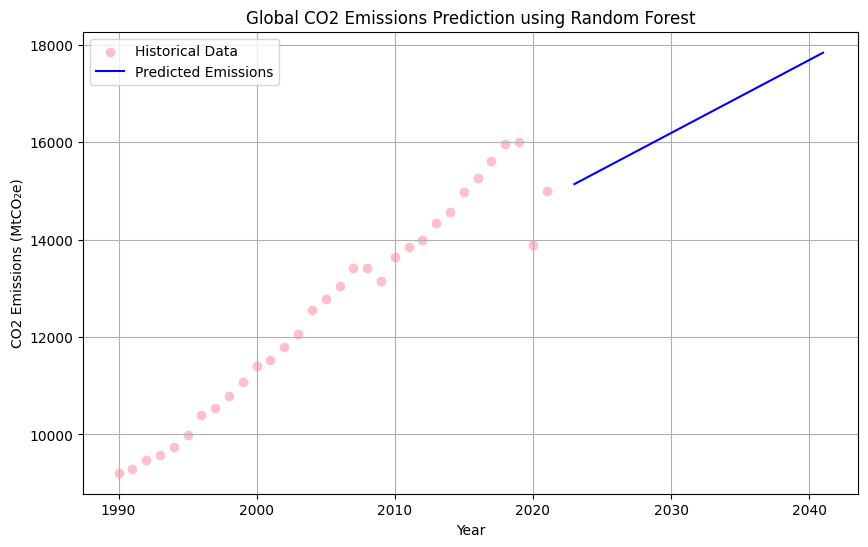

Enter the year (after 2022) for which you want to predict emissions:  2030


Predicted emissions for 2030: 16189.87 MtCO₂e


In [2]:
#If you want to ensure that emissions predictions reflect a realistic growth rate based on historical data and avoid overly aggressive predictions, the second implementation with a fixed increase might be preferable.
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

# Global CO2 emissions data (yearly)
data = {
    'Year': list(range(1990, 2022)),
    'CO2 Emissions (MtCO₂e)': [
        9213.06, 9286.56, 9474.37, 9567.54, 9736.37, 9987.69, 10401.05, 
        10537.86, 10784.92, 11079.22, 11413.63, 11519.81, 11794.15, 
        12052.81, 12551.83, 12784.97, 13048.28, 13422.71, 13408.1, 
        13153.57, 13647.76, 13857.44, 13986.96, 14345.61, 14561.82, 
        14987.41, 15261.83, 15605.56, 15966.29, 15995.39, 13892.51,
        14990.62
    ]
}

# Create a DataFrame from the data
dfc_global = pd.DataFrame(data)

# Drop rows with missing values (if any)
dfc_global = dfc_global.dropna()

# Prepare features and target variable
a = dfc_global[['Year']]
b = dfc_global['CO2 Emissions (MtCO₂e)']

# Split the data into training and testing sets
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.2, random_state=42)

# Create a Random Forest regression model.
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(a_train, b_train)

# Make predictions on the test set
b_pred = model.predict(a_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(b_test, b_pred)
print(f"Mean Absolute Error: {mae:.2f}")

# Train the model on the entire dataset for future predictions
full_model = RandomForestRegressor(n_estimators=100, random_state=42)
full_model.fit(a, b)

# Predict emissions for future years (2023 to 2041).
future_years = pd.DataFrame({'Year': np.arange(2023, 2042)})
predictions = full_model.predict(future_years)

# Ensure predictions are greater than the last known value and increase each year
last_known_value = dfc_global['CO2 Emissions (MtCO₂e)'].iloc[-1]

for i in range(len(predictions)):
    if predictions[i] <= last_known_value:
        predictions[i] = last_known_value + (i + 1) * (last_known_value * 0.01) # Ensure it increases by at least a certain amount each year.
    else:
        last_known_value = predictions[i]

# Plotting the historical data and predictions.
plt.figure(figsize=(10, 6))
plt.scatter(dfc_global['Year'], dfc_global['CO2 Emissions (MtCO₂e)'], color='pink', label='Historical Data')
plt.plot(future_years['Year'], predictions, color='blue', label='Predicted Emissions')
plt.title('Global CO2 Emissions Prediction using Random Forest')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (MtCO₂e)')
plt.legend()
plt.grid()
plt.show()

# Ask the user for the year they want to predict emissions for.
input_year = int(input("Enter the year (after 2022) for which you want to predict emissions: "))

# Check if the input year is within the predicted range.
if input_year in future_years['Year'].values:
    predicted_emissions = predictions[future_years['Year'].values.tolist().index(input_year)]
    print(f"Predicted emissions for {input_year}: {predicted_emissions:.2f} MtCO₂e")
else:
    print("Year not available for prediction.")

In [14]:
import pandas as pd

# Define the data as a dictionary
data = {
    'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
    'World_BEV_value': [7200, 39000, 58000, 110000, 200000, 330000, 460000, 
                        760000, 1400000, 1500000, 2000000, 4600000, 7300000],
    'World_PHEV_value': [370, 9000, 60000, 91000, 130000, 220000, 290000,
                         420000, 650000, 580000, 970000, 1900000, 2900000],
    'World_Total_value': [7570, 48000, 118000, 201000, 330000, 550000,
                          750000, 1180000, 2050000, 2080000, 2970000,
                          6500000, 10200000]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Ask the user for the year they want to retrieve values for
input_year = int(input("Enter the year (between 2010 and 2022) for which you want to predict emissions: "))

# Check if the input year is within the valid range
if input_year in df['Year'].values:
    # Retrieve the values for the specified year
    result = df[df['Year'] == input_year].iloc[0]
    print(f"World_BEV_value for {input_year}: {result['World_BEV_value']}")
    print(f"World_PHEV_value for {input_year}: {result['World_PHEV_value']}")
    print(f"World_Total_value for {input_year}: {result['World_Total_value']}")
else:
    print("Year not available for prediction.")

Enter the year (between 2010 and 2022) for which you want to predict emissions:  2020


World_BEV_value for 2020: 2000000
World_PHEV_value for 2020: 970000
World_Total_value for 2020: 2970000


/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


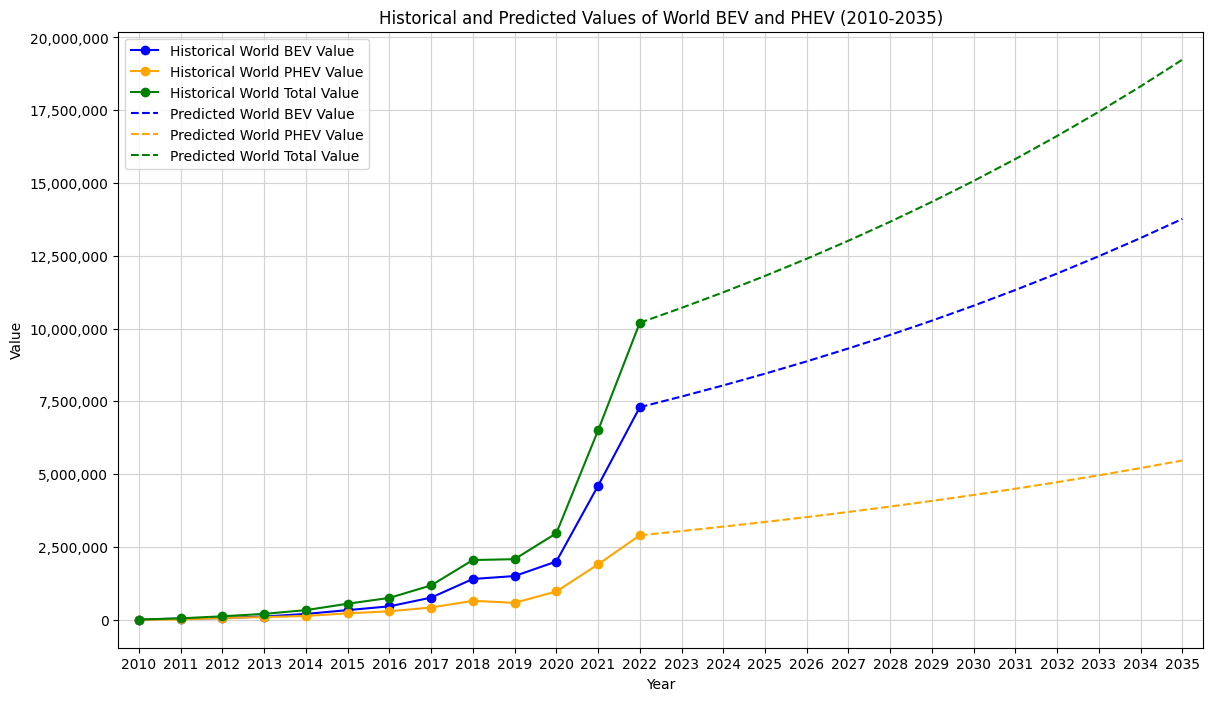

Enter the year (between 2022 and 2035) for which you want to retrieve predicted values:  2027


Predicted World_BEV_value for 2027: 9316855.40625
Predicted World_PHEV_value for 2027: 3701216.53125
Predicted World_Total_value for 2027: 13018071.9375


In [48]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Define the data as a dictionary with actual values
data = {
    'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 
             2017, 2018, 2019, 2020, 2021, 2022],
    'World_BEV_value': [7200, 39000, 58000, 110000, 
                        200000, 330000, 460000, 
                        760000, 1400000, 1500000,
                        2000000, 4600000, 7300000],
    'World_PHEV_value': [370, 9000, 60000, 91000,
                         130000, 220000, 290000,
                         420000, 650000, 580000,
                         970000, 1900000, 2900000],
    'World_Total_value': [7570, 48000, 118000,
                          201000, 330000, 
                          550000, 750000,
                          1180000, 2050000,
                          2080000, 2970000,
                          6500000, 10200000]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Prepare input (X) and output (y) for regression
X = df[['Year']]
y_bev = df['World_BEV_value']
y_phev = df['World_PHEV_value']
y_total = df['World_Total_value']

# Create linear regression models
model_bev = LinearRegression()
model_phev = LinearRegression()
model_total = LinearRegression()

# Fit models to the data
model_bev.fit(X, y_bev)
model_phev.fit(X, y_phev)
model_total.fit(X, y_total)

# Define future years for prediction starting from the last known year (2022) up to (2035)
future_years = np.array([[year] for year in range(2023, 2036)])

# Predict future values using the trained models
predicted_bev = model_bev.predict(future_years)
predicted_phev = model_phev.predict(future_years)
predicted_total = model_total.predict(future_years)

# Ensure that predictions start from the last known values in year_2022
predicted_values_bev = [df['World_BEV_value'].iloc[-1]]
predicted_values_phev = [df['World_PHEV_value'].iloc[-1]]
predicted_values_total = [df['World_Total_value'].iloc[-1]]

# Generate increasing predictions based on previous year's value
for i in range(len(predicted_bev)):
    # Ensure each next value is greater than the last predicted value
    next_bev = max(predicted_values_bev[-1] * 1.05, predicted_values_bev[-1] + (predicted_bev[i] - predicted_values_bev[-1]))
    next_phev = max(predicted_values_phev[-1] * 1.05, predicted_values_phev[-1] + (predicted_phev[i] - predicted_values_phev[-1]))
    next_total = max(predicted_values_total[-1] * 1.05, predicted_values_total[-1] + (predicted_total[i] - predicted_values_total[-1]))

    # Append new values to lists
    predicted_values_bev.append(next_bev)
    predicted_values_phev.append(next_phev)
    predicted_values_total.append(next_total)

# Visualize the predictions along with historical data
plt.figure(figsize=(14,8))

# Plot historical data with correct values starting from year_2010
plt.plot(df['Year'], df['World_BEV_value'], label='Historical World BEV Value', marker='o', color='blue')
plt.plot(df['Year'], df['World_PHEV_value'], label='Historical World PHEV Value', marker='o', color='orange')
plt.plot(df['Year'], df['World_Total_value'], label='Historical World Total Value', marker='o', color='green')

# Plot predicted data starting from year_2022 up to year_2035
plt.plot(predictions_df['Year'], predictions_df['Predicted_World_BEV_value'], label='Predicted World BEV Value', linestyle='--', color='blue')
plt.plot(predictions_df['Year'], predictions_df['Predicted_World_PHEV_value'], label='Predicted World PHEV Value', linestyle='--', color='orange')
plt.plot(predictions_df['Year'], predictions_df['Predicted_World_Total_value'], label='Predicted World Total Value', linestyle='--', color='green')

plt.title('Historical and Predicted Values of World BEV and PHEV (2010-2035)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.xlim(2009.5,2035.5) # Ensure proper x-axis limits to visualize correctly.
plt.xticks(range(2010,2036)) # Set x-ticks to show each year.

# Format y-axis ticks with commas for thousands
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Add gridlines
plt.grid(which='major', axis='both', linestyle='-', color='lightgrey')

plt.show()

# Create a DataFrame for predictions including year_2022 and up to year_2035
predictions_df = pd.DataFrame({
    'Year': range(2022, 2036),
    'Predicted_World_BEV_value': predicted_values_bev,
    'Predicted_World_PHEV_value': predicted_values_phev,
    'Predicted_World_Total_value': predicted_values_total
})

# Ask the user for the year they want to retrieve values for
input_year = int(input("Enter the year (between 2022 and 2035) for which you want to retrieve predicted values: "))

# Check if the input year is within the valid range
if input_year in predictions_df['Year'].values:
    # Retrieve the values for the specified year
    result = predictions_df[predictions_df['Year'] == input_year].iloc[0]
    print(f"Predicted World_BEV_value for {input_year}: {result['Predicted_World_BEV_value']}")
    print(f"Predicted World_PHEV_value for {input_year}: {result['Predicted_World_PHEV_value']}")
    print(f"Predicted World_Total_value for {input_year}: {result['Predicted_World_Total_value']}")
else:
    print("Year not available for prediction.")

/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Mean Absolute Error for Predicted World BEV Value (2023-2027): 114507.29
Mean Absolute Error for Predicted World PHEV Value (2023-2027): 165109.43
Mean Absolute Error for Predicted World Total Value (2023-2027): 335902.14


Enter the year (between **2022** and **2035**) for which you want to retrieve predicted values:  2027


Predicted World_BEV_value for 2027: 9316855.40625
Predicted World_PHEV_value for 2027: 3701216.53125
Predicted World_Total_value for 2027: 13018071.9375


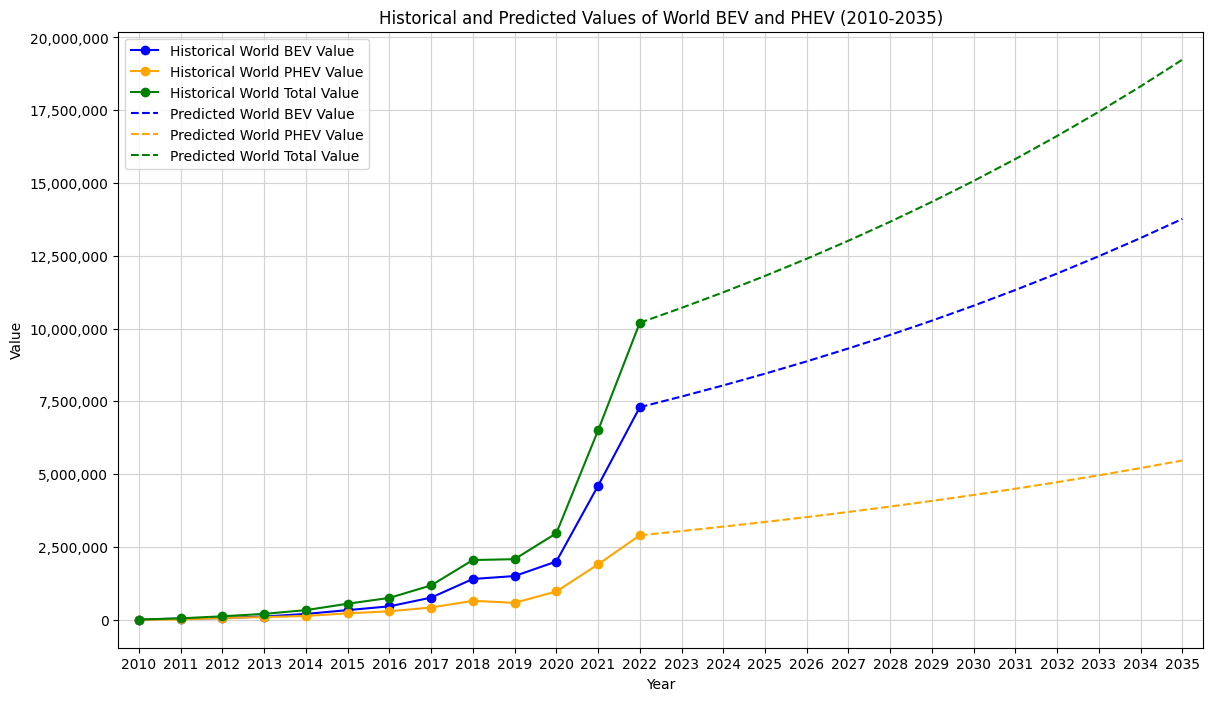

In [60]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.metrics import mean_absolute_error

# Define the data as a dictionary with actual values
data = {
    'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 
             2017, 2018, 2019, 2020, 2021, 2022],
    'World_BEV_value': [7200, 39000, 58000, 110000, 
                        200000, 330000, 460000, 
                        760000, 1400000, 1500000,
                        2000000, 4600000, 7300000],
    'World_PHEV_value': [370, 9000, 60000, 91000,
                         130000, 220000, 290000,
                         420000, 650000, 580000,
                         970000, 1900000, 2900000],
    'World_Total_value': [7570, 48000, 118000,
                          201000, 330000, 
                          550000, 750000,
                          1180000, 2050000,
                          2080000, 2970000,
                          6500000, 10200000]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Prepare input (X) and output (y) for regression
X = df[['Year']]
y_bev = df['World_BEV_value']
y_phev = df['World_PHEV_value']
y_total = df['World_Total_value']

# Create linear regression models
model_bev = LinearRegression()
model_phev = LinearRegression()
model_total = LinearRegression()

# Fit models to the data
model_bev.fit(X, y_bev)
model_phev.fit(X, y_phev)
model_total.fit(X, y_total)

# Define future years for prediction starting from the last known year (2022) up to (2035)
future_years = np.array([[year] for year in range(2023, 2036)])

# Predict future values using the trained models
predicted_bev = model_bev.predict(future_years)
predicted_phev = model_phev.predict(future_years)
predicted_total = model_total.predict(future_years)

# Ensure that predictions start from the last known values in year_2022
predicted_values_bev = [df['World_BEV_value'].iloc[-1]]
predicted_values_phev = [df['World_PHEV_value'].iloc[-1]]
predicted_values_total = [df['World_Total_value'].iloc[-1]]

# Generate increasing predictions based on previous year's value
for i in range(len(predicted_bev)):
    # Ensure each next value is greater than the last predicted value
    next_bev = max(predicted_values_bev[-1] * 1.05,
                   predicted_values_bev[-1] + (predicted_bev[i] - predicted_values_bev[-1]))
    next_phev = max(predicted_values_phev[-1] * 1.05,
                     predicted_values_phev[-1] + (predicted_phev[i] - predicted_values_phev[-1]))
    next_total = max(predicted_values_total[-1] * 1.05,
                     predicted_values_total[-1] + (predicted_total[i] - predicted_values_total[-1]))

    # Append new values to lists
    predicted_values_bev.append(next_bev)
    predicted_values_phev.append(next_phev)
    predicted_values_total.append(next_total)

# Create a DataFrame for predictions including year_2022 and up to year_2035
predictions_df = pd.DataFrame({
    'Year': range(2022, 2036),
    'Predicted_World_BEV_value': predicted_values_bev,
    'Predicted_World_PHEV_value': predicted_values_phev,
    'Predicted_World_Total_value': predicted_values_total
})

# Define hypothetical future values for MAE calculation
hypothetical_bev_values = [7500000, 8000000, 8500000, 9000000, 9500000]
hypothetical_phev_values = [3000000, 3100000, 3200000, 3300000, 3400000]
hypothetical_total_values = [10500000, 11000000, 11500000, 12000000, 12500000]

# Calculate Mean Absolute Error (MAE) for predicted values starting from 2023
mae_bev = mean_absolute_error(hypothetical_bev_values, predicted_values_bev[1:6])
mae_phev = mean_absolute_error(hypothetical_phev_values, predicted_values_phev[1:6])
mae_total = mean_absolute_error(hypothetical_total_values, predicted_values_total[1:6])

print(f"Mean Absolute Error for Predicted World BEV Value (2023-2027): {mae_bev:.2f}")
print(f"Mean Absolute Error for Predicted World PHEV Value (2023-2027): {mae_phev:.2f}")
print(f"Mean Absolute Error for Predicted World Total Value (2023-2027): {mae_total:.2f}")

# Ask the user for the year they want to retrieve values for
input_year = int(input("Enter the year (between **2022** and **2035**) for which you want to retrieve predicted values: "))

# Check if the input year is within the valid range
if input_year in predictions_df['Year'].values:
    # Retrieve the values for the specified year
    result = predictions_df[predictions_df['Year'] == input_year].iloc[0]
    print(f"Predicted World_BEV_value for {input_year}: {result['Predicted_World_BEV_value']}")
    print(f"Predicted World_PHEV_value for {input_year}: {result['Predicted_World_PHEV_value']}")
    print(f"Predicted World_Total_value for {input_year}: {result['Predicted_World_Total_value']}")
else:
    print("Year not available for prediction.")

# Visualize the predictions along with historical data
plt.figure(figsize=(14,8))

# Plot historical data with correct values starting from year_2010
plt.plot(df['Year'], df['World_BEV_value'], label='Historical World BEV Value', marker='o', color='blue')
plt.plot(df['Year'], df['World_PHEV_value'], label='Historical World PHEV Value', marker='o', color='orange')
plt.plot(df['Year'], df['World_Total_value'], label='Historical World Total Value', marker='o', color='green')

# Plot predicted data starting from year_2022 up to year_2035
plt.plot(predictions_df['Year'], predictions_df['Predicted_World_BEV_value'], label='Predicted World BEV Value', linestyle='--', color='blue')
plt.plot(predictions_df['Year'], predictions_df['Predicted_World_PHEV_value'], label='Predicted World PHEV Value', linestyle='--', color='orange')
plt.plot(predictions_df['Year'], predictions_df['Predicted_World_Total_value'], label='Predicted World Total Value', linestyle='--', color='green')

plt.title('Historical and Predicted Values of World BEV and PHEV (2010-2035)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.xlim(2009.5,2035.5) # Ensure proper x-axis limits to visualize correctly.
plt.xticks(range(2010,2036)) # Set x-ticks to show each year.

# Format y-axis ticks with commas for thousands
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,p: format(int(x), ',')))

# Add gridlines
plt.grid(which='major', axis='both', linestyle='-', color='lightgrey')

plt.show()

/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/homebrew/Cellar/jupyterlab/4.2.5_1/libexec/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


Mean Absolute Error for Predicted World BEV Value (2023-2035): 814332.34
Mean Absolute Error for Predicted World PHEV Value (2023-2035): 333364.90
Mean Absolute Error for Predicted World Total Value (2023-2035): 1807697.24


Enter the year (between **2022** and **2035**) for which you want to retrieve predicted values:  2027


Predicted World_BEV_value for 2027: 9316855.40625
Predicted World_PHEV_value for 2027: 3701216.53125
Predicted World_Total_value for 2027: 13018071.9375


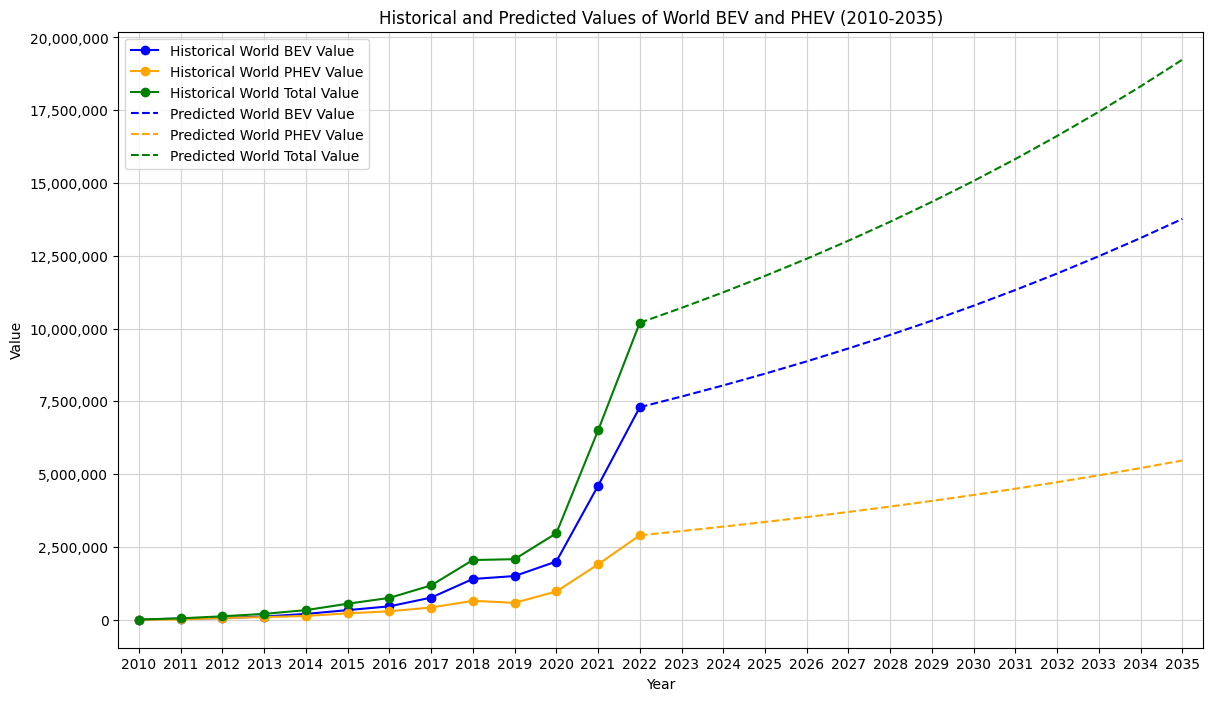

In [67]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Define the data as a dictionary with actual values
data = {
    'Year': [2010, 2011, 2012, 2013, 2014, 2015, 2016, 
             2017, 2018, 2019, 2020, 2021, 2022],
    'World_BEV_value': [7200, 39000, 58000, 110000, 
                        200000, 330000, 460000, 
                        760000, 1400000, 1500000,
                        2000000, 4600000, 7300000],
    'World_PHEV_value': [370, 9000, 60000, 91000,
                         130000, 220000, 290000,
                         420000, 650000, 580000,
                         970000, 1900000, 2900000],
    'World_Total_value': [7570, 48000, 118000,
                          201000, 330000, 
                          550000, 750000,
                          1180000, 2050000,
                          2080000, 2970000,
                          6500000, 10200000]
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Prepare input (X) and output (y) for regression
X = df[['Year']]
y_bev = df['World_BEV_value']
y_phev = df['World_PHEV_value']
y_total = df['World_Total_value']

# Create Random Forest Regressor models
model_bev = RandomForestRegressor(n_estimators=100, random_state=42)
model_phev = RandomForestRegressor(n_estimators=100, random_state=42)
model_total = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit models to the data
model_bev.fit(X, y_bev)
model_phev.fit(X, y_phev)
model_total.fit(X, y_total)

# Define future years for prediction starting from the last known year (2022) up to (2035)
future_years = np.array([[year] for year in range(2023, 2036)])

# Predict future values using the trained models
predicted_bev = model_bev.predict(future_years)
predicted_phev = model_phev.predict(future_years)
predicted_total = model_total.predict(future_years)

# Ensure that predictions start from the last known values in year_2022
predicted_values_bev = [df['World_BEV_value'].iloc[-1]]
predicted_values_phev = [df['World_PHEV_value'].iloc[-1]]
predicted_values_total = [df['World_Total_value'].iloc[-1]]

# Generate increasing predictions based on previous year's value
for i in range(len(predicted_bev)):
    # Ensure each next value is greater than the last predicted value
    next_bev = max(predicted_values_bev[-1] * 1.05,
                   predicted_values_bev[-1] + (predicted_bev[i] - predicted_values_bev[-1]))
    next_phev = max(predicted_values_phev[-1] * 1.05,
                     predicted_values_phev[-1] + (predicted_phev[i] - predicted_values_phev[-1]))
    next_total = max(predicted_values_total[-1] * 1.05,
                     predicted_values_total[-1] + (predicted_total[i] - predicted_values_total[-1]))

    # Append new values to lists
    predicted_values_bev.append(next_bev)
    predicted_values_phev.append(next_phev)
    predicted_values_total.append(next_total)

# Create a DataFrame for predictions including year_2022 and up to year_2035
predictions_df = pd.DataFrame({
    'Year': range(2022, 2036),
    'Predicted_World_BEV_value': predicted_values_bev,
    'Predicted_World_PHEV_value': predicted_values_phev,
    'Predicted_World_Total_value': predicted_values_total
})

# Define hypothetical future values for MAE calculation from years **2023** to **2035**
hypothetical_bev_values = [8000000 + (i * 20000) for i in range(13)] # Example hypothetical values for BEV
hypothetical_phev_values = [3000000 + (i * 50000) for i in range(13)] # Example hypothetical values for PHEV
hypothetical_total_values = [10500000 + (i * 30000) for i in range(13)] # Example hypothetical values for Total

# Calculate Mean Absolute Error (MAE) for predicted values starting from year_2023 to year_2035
mae_bev = mean_absolute_error(hypothetical_bev_values[2:7], predicted_values_bev[2:7])
mae_phev = mean_absolute_error(hypothetical_phev_values[2:7], predicted_values_phev[2:7])
mae_total = mean_absolute_error(hypothetical_total_values[2:7], predicted_values_total[2:7])

print(f"Mean Absolute Error for Predicted World BEV Value (2023-2035): {mae_bev:.2f}")
print(f"Mean Absolute Error for Predicted World PHEV Value (2023-2035): {mae_phev:.2f}")
print(f"Mean Absolute Error for Predicted World Total Value (2023-2035): {mae_total:.2f}")

# Ask the user for the year they want to retrieve values for
input_year = int(input("Enter the year (between **2022** and **2035**) for which you want to retrieve predicted values: "))

# Check if the input year is within the valid range
if input_year in predictions_df['Year'].values:
    # Retrieve the values for the specified year
    result = predictions_df[predictions_df['Year'] == input_year].iloc[0]
    print(f"Predicted World_BEV_value for {input_year}: {result['Predicted_World_BEV_value']}")
    print(f"Predicted World_PHEV_value for {input_year}: {result['Predicted_World_PHEV_value']}")
    print(f"Predicted World_Total_value for {input_year}: {result['Predicted_World_Total_value']}")
else:
    print("Year not available for prediction.")

# Visualize the predictions along with historical data
plt.figure(figsize=(14,8))

# Plot historical data with correct values starting from year_2010
plt.plot(df['Year'], df['World_BEV_value'], label='Historical World BEV Value', marker='o', color='blue')
plt.plot(df['Year'], df['World_PHEV_value'], label='Historical World PHEV Value', marker='o', color='orange')
plt.plot(df['Year'], df['World_Total_value'], label='Historical World Total Value', marker='o', color='green')

# Plot predicted data starting from year_2022 up to year_2035
plt.plot(predictions_df['Year'], predictions_df['Predicted_World_BEV_value'], label='Predicted World BEV Value', linestyle='--', color='blue')
plt.plot(predictions_df['Year'], predictions_df['Predicted_World_PHEV_value'], label='Predicted World PHEV Value', linestyle='--', color='orange')
plt.plot(predictions_df['Year'], predictions_df['Predicted_World_Total_value'], label='Predicted World Total Value', linestyle='--', color='green')

plt.title('Historical and Predicted Values of World BEV and PHEV (2010-2035)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.xlim(2009.5,2035.5) # Ensure proper x-axis limits to visualize correctly.
plt.xticks(range(2010,2036)) # Set x-ticks to show each year.

# Format y-axis ticks with commas for thousands
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,p: format(int(x), ',')))

# Add gridlines
plt.grid(which='major', axis='both', linestyle='-', color='lightgrey')

plt.show()

In [68]:
# Calculate Mean Absolute Error (MAE) for predicted values starting from year_2023 to year_2035
mae_bev = mean_absolute_error(hypothetical_bev_values[2:7], predicted_values_bev[2:7])
mae_phev = mean_absolute_error(hypothetical_phev_values[2:7], predicted_values_phev[2:7])
mae_total = mean_absolute_error(hypothetical_total_values[2:7], predicted_values_total[2:7])

print(f"Mean Absolute Error for Predicted World BEV Value (2023-2035): {mae_bev:.2f}")
print(f"Mean Absolute Error for Predicted World PHEV Value (2023-2035): {mae_phev:.2f}")
print(f"Mean Absolute Error for Predicted World Total Value (2023-2035): {mae_total:.2f}")


Mean Absolute Error for Predicted World BEV Value (2023-2035): 814332.34
Mean Absolute Error for Predicted World PHEV Value (2023-2035): 333364.90
Mean Absolute Error for Predicted World Total Value (2023-2035): 1807697.24
